# Project - Prediction of Subject based on Question (NLP)

In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


### Loading dataset

In [2]:
df = pd.read_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Prediction of Subject based on Question (NLP)\Dataset/Data.csv' ,encoding='utf-8')
df.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122519 entries, 0 to 122518
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   eng      122519 non-null  object
 1   Subject  122519 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [4]:
df.isna().sum()

eng        0
Subject    0
dtype: int64

### Distinct values of the dataset

In [5]:
print ("Subject Categories")
print (df['Subject'].value_counts())

Subject Categories
Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: Subject, dtype: int64


In [6]:
print ("Distinct Subjects :\n\n ")
print (df['Subject'].unique())

Distinct Subjects :

 
['Biology' 'Chemistry' 'Maths' 'Physics']


### Data Visualizations

<AxesSubplot:xlabel='count', ylabel='Subject'>

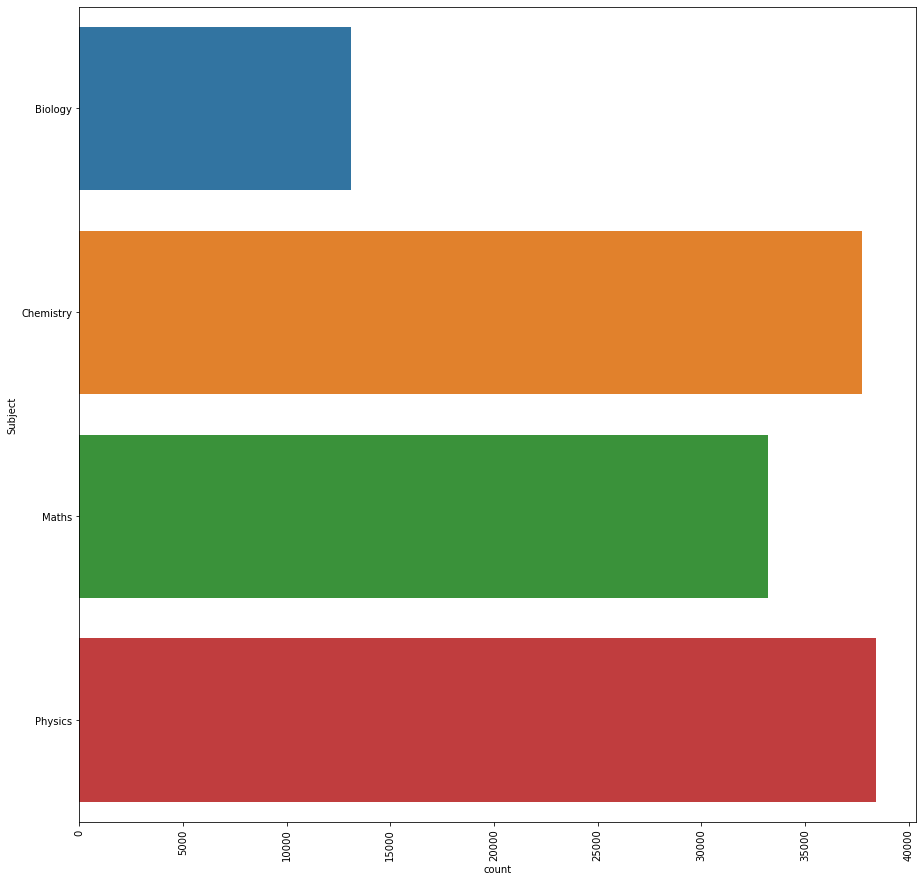

In [7]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Subject", data=df)

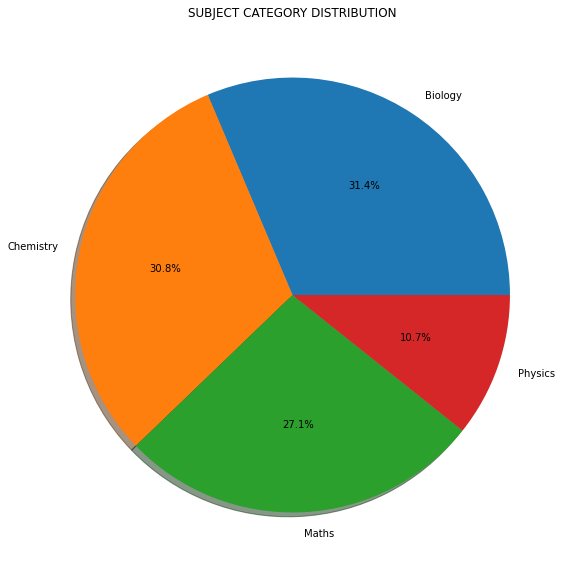

In [8]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Subject'].value_counts()
targetLabels  = df['Subject'].unique()

plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='SUBJECT CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [9]:
df["eng"][7]

'The sides of a right angled triangle are in A.P. The ratio of sides is\nA .1: 2: 3\nB. 2:3:4\n\\( c \\cdot 3: 4: 5 \\)\n\\( D \\cdot 5: 8: 3 \\)'

### Data Cleaning

In [10]:
import re
def cleaning(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text
    
df['Cleaned_eng'] = df.eng.apply(lambda x: cleaning(x))

In [11]:
df

,eng,Subject,Cleaned_eng
0,An anti-forest measure is\nA. Afforestation\nB...,Biology,An anti forest measure is A Afforestation B Se...
1,"Among the following organic acids, the acid pr...",Chemistry,Among the following organic acids the acid pre...
2,If the area of two similar triangles are equal...,Maths,If the area of two similar triangles are equal...
3,"In recent year, there has been a growing\nconc...",Biology,In recent year there has been a growing concer...
4,Which of the following statement\nregarding tr...,Physics,Which of the following statement regarding tra...
...,...,...,...
122514,Which of the following group of\ncharacters is...,Biology,Which of the following group of characters is ...
122515,Light year is the\nA. light emitted by the sun...,Physics,Light year is the A light emitted by the sun i...
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology,Member of Dipnoi are native of A India B Afric...
122517,"In one average-life,\nA. half the active nucle...",Physics,In one average life A half the active nuclei d...


In [12]:
df.reset_index(inplace=True)

In [13]:
df.shape

(122519, 4)

In [14]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

In [15]:
df['Cleaned_eng'][7]

'The sides of a right angled triangle are in A P The ratio of sides is A 1 2 3 B 2 3 4 c cdot 3 4 5 D cdot 5 8 3 '

#### Removing the numeric values

In [16]:
new_text1 = []
for i in range(len(df['Cleaned_eng'])):
    text1=re.sub('[^a-zA-Z]', ' ', df['Cleaned_eng'][i])
    new_text1.append(text1)

In [17]:
new_text1[7]

'The sides of a right angled triangle are in A P The ratio of sides is A       B       c cdot       D cdot       '

#### Removing the spaces 

In [18]:
new_text2 = []
for i in range(len(new_text1)):
    text2=new_text1[i].strip()
    new_text2.append(text2)

In [19]:
new_text2[7]

'The sides of a right angled triangle are in A P The ratio of sides is A       B       c cdot       D cdot'

#### Setting all words to Lower Case

In [20]:
new_text3 = []
for i in range(len(new_text2)):
    text3=new_text2[i].lower()
    new_text3.append(text3)

In [21]:
new_text3[7]

'the sides of a right angled triangle are in a p the ratio of sides is a       b       c cdot       d cdot'

#### Performing stemming

In [22]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    new_text4 = [stemmer.stem(t) for t in new_text3]

In [23]:
new_text4[7]

'the sides of a right angled triangle are in a p the ratio of sides is a       b       c cdot       d cdot'

In [24]:
df['Extracted_Text'] = new_text4

In [25]:
df

,index,eng,Subject,Cleaned_eng,Extracted_Text
0,0,An anti-forest measure is\nA. Afforestation\nB...,Biology,An anti forest measure is A Afforestation B Se...,an anti forest measure is a afforestation b se...
1,1,"Among the following organic acids, the acid pr...",Chemistry,Among the following organic acids the acid pre...,among the following organic acids the acid pre...
2,2,If the area of two similar triangles are equal...,Maths,If the area of two similar triangles are equal...,if the area of two similar triangles are equal...
3,3,"In recent year, there has been a growing\nconc...",Biology,In recent year there has been a growing concer...,in recent year there has been a growing concer...
4,4,Which of the following statement\nregarding tr...,Physics,Which of the following statement regarding tra...,which of the following statement regarding tra...
...,...,...,...,...,...
122514,122514,Which of the following group of\ncharacters is...,Biology,Which of the following group of characters is ...,which of the following group of characters is ...
122515,122515,Light year is the\nA. light emitted by the sun...,Physics,Light year is the A light emitted by the sun i...,light year is the a light emitted by the sun i...
122516,122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology,Member of Dipnoi are native of A India B Afric...,member of dipnoi are native of a india b afric...
122517,122517,"In one average-life,\nA. half the active nucle...",Physics,In one average life A half the active nuclei d...,in one average life a half the active nuclei d...


In [26]:
len(df)

122519

In [27]:
corpus=" "

for i in range(0,962):
    corpus= corpus+ df["Extracted_Text"][i]

In [28]:
corpus[1000:3000]

'by a seeds b spores c laying eggs d giving birth to young fern plelectric current flows through a a conductor b an insulator c free space d none of thesthe sides of a right angled triangle are in a p the ratio of sides is a       b       c cdot       d cdotif the mass of a body is m on the surface of the earth the mass of the same body on the surface of the moon is a m   m c cdot   m d zeroa particle of mass m is made to move with uniform speed v along the perimeter of a regular hexagon the magnitude of impulse applied at each corner is a m v b m v sqrt   c frac m v   d frac m v sqrtconvert into mixed fractions a frac     b fracan insect sits on the end of a long board of length   m the board rests on a frictionless horizontal table the insect wants to jump to the opposite end of the board what is the minimum take off speed in mathrm m mathrm s of insect relative to ground that allows the insect to do the trick the board and the insect have equal masses left boldsymbol g mathbf     bo

#### Tokenizing the text

In [29]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)

len(tokens)

34039

#### Removing the stopwords

In [30]:
words = []

for word in tokens:
    words.append(word.lower())

In [31]:
stopwords = nltk.corpus.stopwords.words('english')

new_words = []

for word in words:
    if word not in stopwords:
        new_words.append(word)

In [32]:
new_words

['anti',
 'forest',
 'measure',
 'afforestation',
 'b',
 'selective',
 'grazing',
 'c',
 'clearing',
 'forest',
 'selective',
 'felamong',
 'following',
 'organic',
 'acids',
 'acid',
 'present',
 'rancid',
 'butter',
 'pyruvic',
 'acid',
 'b',
 'lactic',
 'acid',
 'c',
 'butyric',
 'acid',
 'acetic',
 'acidif',
 'area',
 'two',
 'similar',
 'triangles',
 'equal',
 'equilateral',
 'b',
 'isosceles',
 'c',
 'congruent',
 'congruin',
 'recent',
 'year',
 'growing',
 'concern',
 'gradually',
 'increasing',
 'average',
 'global',
 'temperatures',
 'trend',
 'continues',
 'would',
 'expert',
 'distributional',
 'range',
 'species',
 'affectwhich',
 'following',
 'statement',
 'regarding',
 'transformer',
 'incorrect',
 'transformer',
 'makes',
 'use',
 'faradays',
 'law',
 'b',
 'ferromagnetic',
 'properties',
 'iron',
 'core',
 'used',
 'efficiently',
 'raise',
 'lower',
 'ac',
 'voltage',
 'c',
 'cannot',
 'increase',
 'power',
 'voltage',
 'raised',
 'current',
 'proportionally',
 'lower

In [33]:
len(new_words)

21231

#### Performing lemmatization

In [34]:
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer() 

lem_words=[]

for word in new_words:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [35]:
lem_words

['anti',
 'forest',
 'measure',
 'afforestation',
 'b',
 'selective',
 'grazing',
 'c',
 'clearing',
 'forest',
 'selective',
 'felamong',
 'following',
 'organic',
 'acid',
 'acid',
 'present',
 'rancid',
 'butter',
 'pyruvic',
 'acid',
 'b',
 'lactic',
 'acid',
 'c',
 'butyric',
 'acid',
 'acetic',
 'acidif',
 'area',
 'two',
 'similar',
 'triangle',
 'equal',
 'equilateral',
 'b',
 'isosceles',
 'c',
 'congruent',
 'congruin',
 'recent',
 'year',
 'growing',
 'concern',
 'gradually',
 'increasing',
 'average',
 'global',
 'temperature',
 'trend',
 'continues',
 'would',
 'expert',
 'distributional',
 'range',
 'specie',
 'affectwhich',
 'following',
 'statement',
 'regarding',
 'transformer',
 'incorrect',
 'transformer',
 'make',
 'use',
 'faraday',
 'law',
 'b',
 'ferromagnetic',
 'property',
 'iron',
 'core',
 'used',
 'efficiently',
 'raise',
 'lower',
 'ac',
 'voltage',
 'c',
 'cannot',
 'increase',
 'power',
 'voltage',
 'raised',
 'current',
 'proportionally',
 'lowered',
 'v

In [36]:
len(lem_words)

21231

In [37]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==new_words[i]):
        same=same+1
    elif(lem_words[i]!=new_words[i]):
        diff=diff+1
        
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 114
Number of words not Lemmatized= 1718


#### Frequency Distribution Plot

In [38]:
freq_dist = nltk.FreqDist(lem_words)

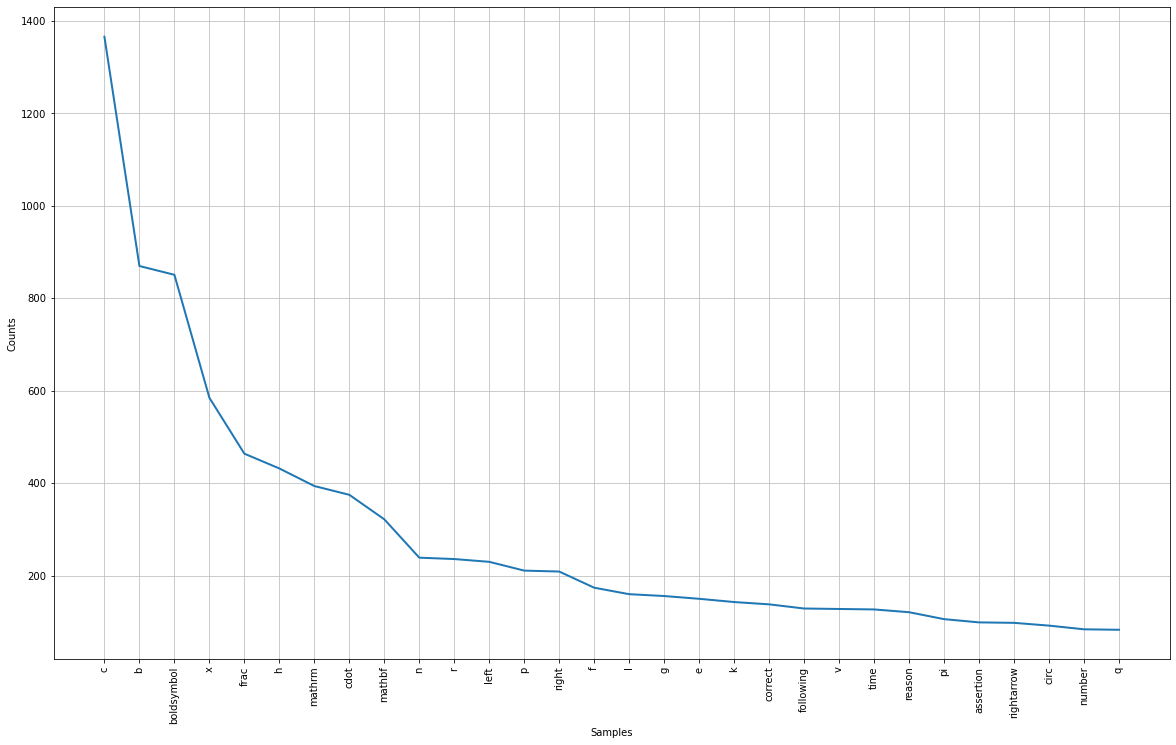

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [40]:
len(freq_dist)

3575

#### Displaying Most common words

In [41]:
common_words = freq_dist.most_common(50)

In [42]:
common_words

[('c', 1366),
 ('b', 870),
 ('boldsymbol', 851),
 ('x', 585),
 ('frac', 464),
 ('h', 432),
 ('mathrm', 394),
 ('cdot', 375),
 ('mathbf', 322),
 ('n', 239),
 ('r', 236),
 ('left', 230),
 ('p', 211),
 ('right', 209),
 ('f', 174),
 ('l', 160),
 ('g', 156),
 ('e', 150),
 ('k', 143),
 ('correct', 138),
 ('following', 129),
 ('v', 128),
 ('time', 127),
 ('reason', 121),
 ('pi', 106),
 ('assertion', 99),
 ('rightarrow', 98),
 ('circ', 92),
 ('number', 84),
 ('q', 83),
 ('two', 82),
 ('z', 80),
 ('j', 75),
 ('sqrt', 74),
 ('value', 71),
 ('reaction', 68),
 ('none', 65),
 ('point', 65),
 ('true', 64),
 ('mass', 62),
 ('sin', 62),
 ('array', 62),
 ('given', 57),
 ('find', 57),
 ('equal', 55),
 ('angle', 55),
 ('water', 54),
 ('ii', 53),
 ('energy', 52),
 ('end', 51)]

In [43]:
res=' '.join([i for i in lem_words if not i.isdigit()])

### WordCloud Vizualizations

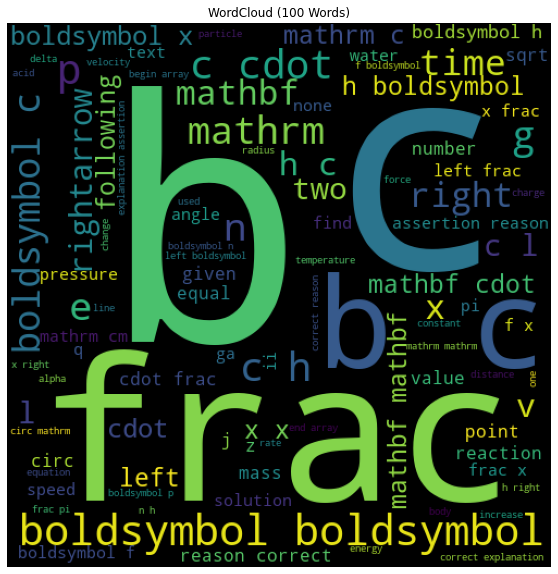

In [44]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=500,
                          height=500
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('WordCloud (100 Words)')
plt.axis('off')
plt.show()

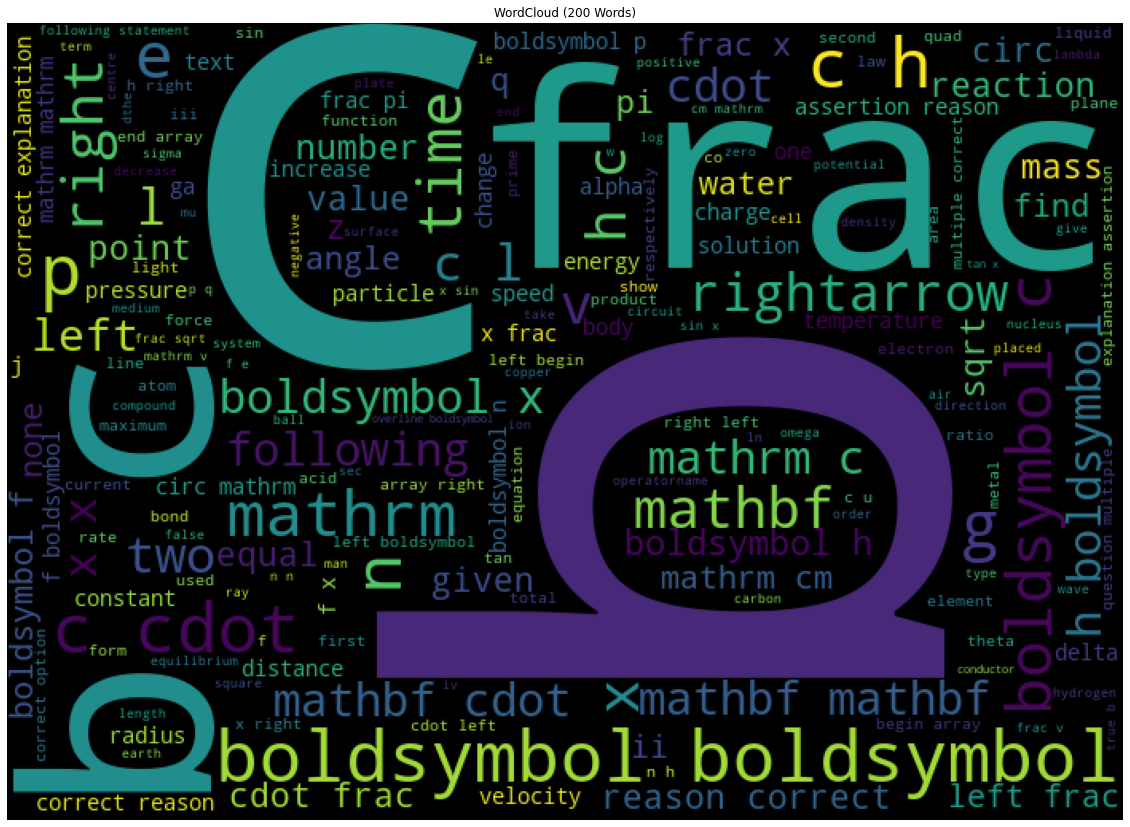

In [45]:
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=700,
                          height=500
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('WordCloud (200 Words)')
plt.axis('off')
plt.show()

In [46]:
from PIL import Image
img = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Prediction of Subject based on Question (NLP)\Images/mask_img.png"))

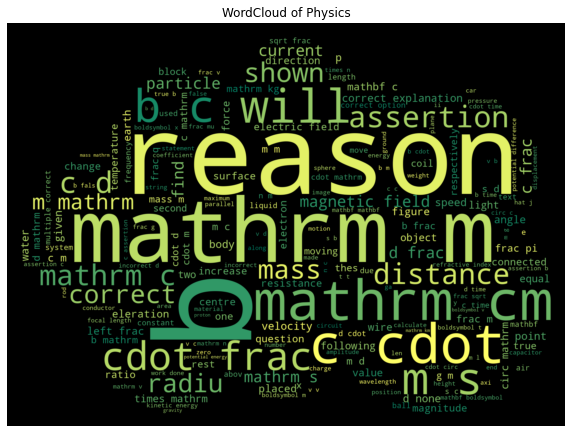

In [47]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img, background_color='black',
               max_words = 200 , width = 700 , height = 700,
               contour_width = 1, contour_color = 'black', colormap = "summer").generate(" ".join(df[df.Subject == "Physics"].Extracted_Text))
plt.axis("off")
plt.title('WordCloud of Physics')
plt.imshow(Wc , interpolation = 'bilinear')

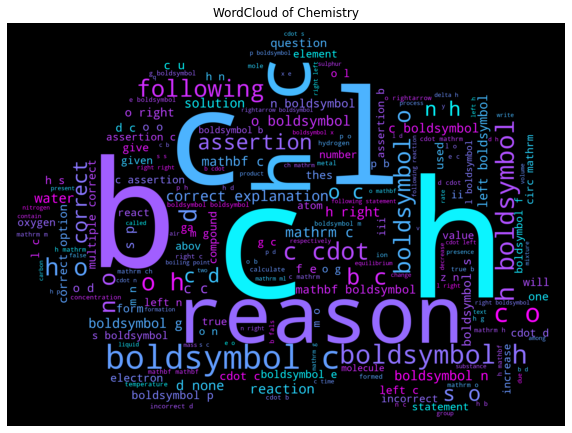

In [48]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img, background_color='black',
               max_words = 200 , width = 700 , height = 700, 
               contour_width = 1, contour_color = 'black', colormap = "cool").generate(" ".join(df[df.Subject == "Chemistry"].Extracted_Text))
plt.axis("off")
plt.title('WordCloud of Chemistry')
plt.imshow(Wc , interpolation = 'bilinear')

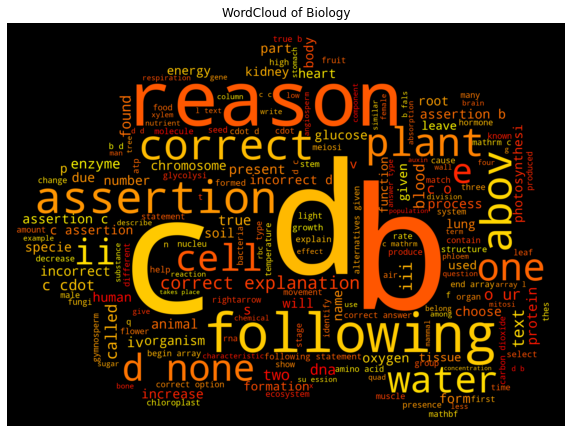

In [49]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img, background_color='black',
               max_words = 200 , width = 700 , height = 700, 
               contour_width = 1, contour_color = 'black', colormap = "autumn").generate(" ".join(df[df.Subject == "Biology"].Extracted_Text))
plt.axis("off")
plt.title('WordCloud of Biology')
plt.imshow(Wc , interpolation = 'bilinear')

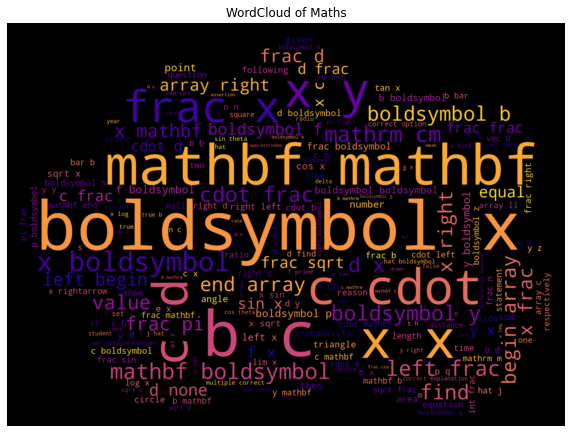

In [50]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img, background_color='black',
               max_words = 200 , width = 700 , height = 700, 
               contour_width = 1, contour_color = 'black', colormap = "plasma").generate(" ".join(df[df.Subject == "Maths"].Extracted_Text))
plt.axis("off")
plt.title('WordCloud of Maths')
plt.imshow(Wc , interpolation = 'bilinear')

### Saving the dataframe with Preprocessed Text to build the classification model

In [51]:
df.drop('index',axis=1,inplace=True)

In [52]:
df.head()

,eng,Subject,Cleaned_eng,Extracted_Text
0,An anti-forest measure is\nA. Afforestation\nB...,Biology,An anti forest measure is A Afforestation B Se...,an anti forest measure is a afforestation b se...
1,"Among the following organic acids, the acid pr...",Chemistry,Among the following organic acids the acid pre...,among the following organic acids the acid pre...
2,If the area of two similar triangles are equal...,Maths,If the area of two similar triangles are equal...,if the area of two similar triangles are equal...
3,"In recent year, there has been a growing\nconc...",Biology,In recent year there has been a growing concer...,in recent year there has been a growing concer...
4,Which of the following statement\nregarding tr...,Physics,Which of the following statement regarding tra...,which of the following statement regarding tra...


In [53]:
df.to_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Prediction of Subject based on Question (NLP)\Dataset\Preprocessed Data.csv')